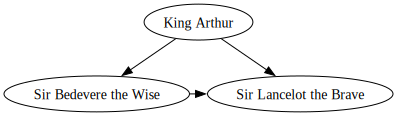

In [2]:
import graphviz

round_table = graphviz.Digraph('round-table', comment='The Round Table')  
round_table.node('A', 'King Arthur')  
round_table.node('B', 'Sir Bedevere the Wise')
round_table.node('L', 'Sir Lancelot the Brave')
round_table.edges(['AB', 'AL'])
round_table.edge('B', 'L', constraint='false')
round_table

In [1]:
from nn.value import Value

# function: y = 3x + 2, a = 3 and b = 2
a = Value(2, _label="a")
b = Value(-3, _label="b")
c = Value(10, _label="c")
e = a * b
e.label = "e"
d = e + c
d.label = "d"
f = Value(-2, _label="f")
L = d * f
print(L)


<class 'nn.value.Value'>(data=-8)


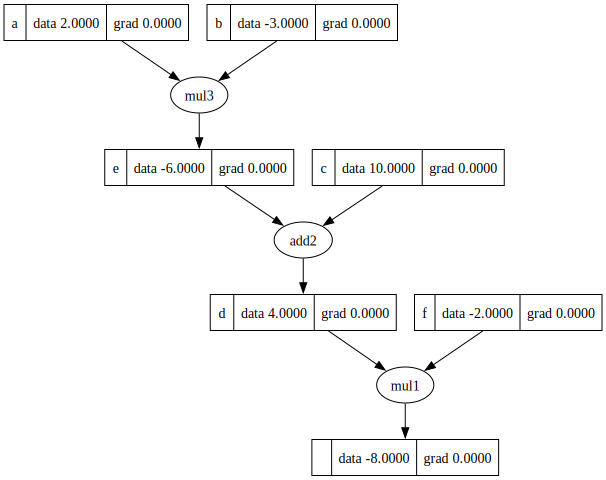

In [2]:
from nn.utils import draw_compute_graph

draw_compute_graph(L)

In [3]:
def backprop(root, grad_accumulator=None):
    if not root.grad:
        root.grad = 1
        grad_accumulator = root.grad
    if root.operator:
        opname = root.operator[0:3]
        print(opname)
        if opname == "add":
            for prev in root.previous:
                prev.grad = grad_accumulator
                backprop(prev, grad_accumulator)
        if opname == "mul":
            root.previous[0].grad = grad_accumulator * root.previous[1].data
            backprop(root.previous[0], grad_accumulator * root.previous[0].grad)
            root.previous[1].grad = grad_accumulator * root.previous[0].data
            backprop(root.previous[1], grad_accumulator * root.previous[1].grad)
    return root            
    

mul
add
mul


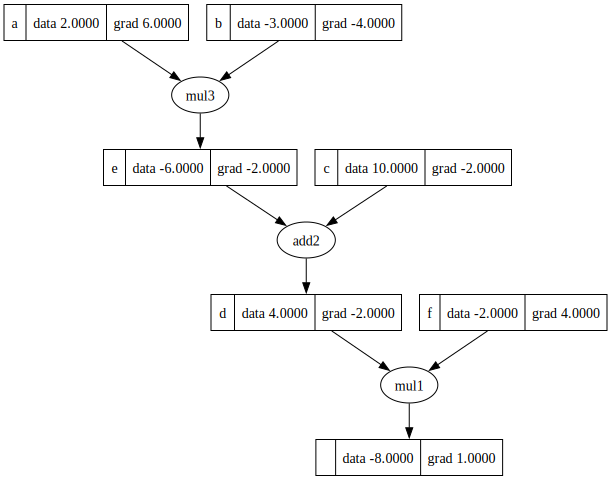

In [4]:
bp = backprop(L)
draw_compute_graph(bp)